In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%pylab inline
import sys
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages/yt-3.2.dev0-py2.7-linux-x86_64.egg')
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages')
sys.path.append('/global/homes/d/dorislee/mypythonpackages')

Populating the interactive namespace from numpy and matplotlib


In [3]:
import yt
yt.funcs.mylog.setLevel(50) #coerce output null

In [5]:
yt.funcs.mylog.setLevel(50) #coerce output null

In [6]:
cd ~/ramses/trunk/ramses/bin/

/global/u2/d/dorislee/ramses/trunk/ramses/bin



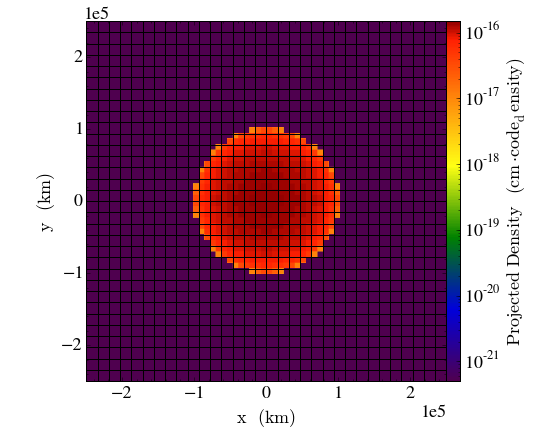

In [9]:
ds= yt.ddload("output_00001/info_00001.txt")
proj = yt.ProjectionPlot(ds, "z", "Density" ,window_size=5)
proj.set_cmap("density","rainbow")
proj.annotate_velocity()
proj.annotate_grids()
proj.show()


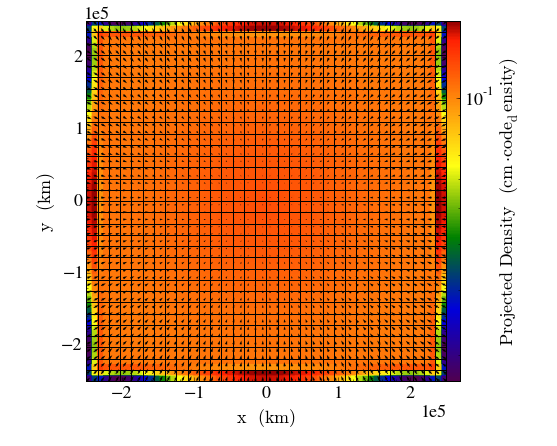

In [10]:
ds= yt.load("output_00002/info_00002.txt")
proj = yt.ProjectionPlot(ds, "z", "Density" ,window_size=5)
proj.set_cmap("density","rainbow")
proj.annotate_velocity()
proj.annotate_grids()
proj.show()

In [11]:
def plot_time_slice(physical_quantity,timestep):
    ds= yt.load("output_0000{0}/info_0000{0}.txt".format(timestep))
    proj = yt.SlicePlot(ds, "z",physical_quantity ,window_size=7)
    proj.set_cmap(physical_quantity,"rainbow")
    proj.annotate_velocity()
    proj.annotate_grids()
    proj.show()


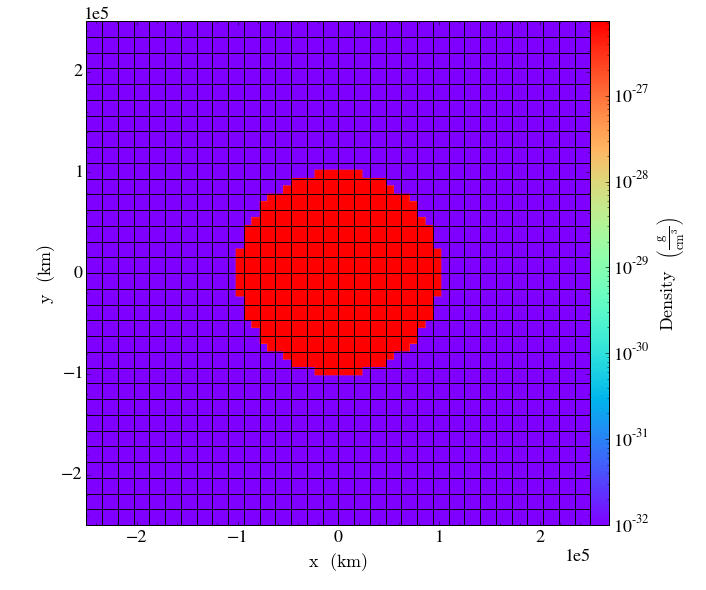

In [12]:
plot_time_slice("density",1)


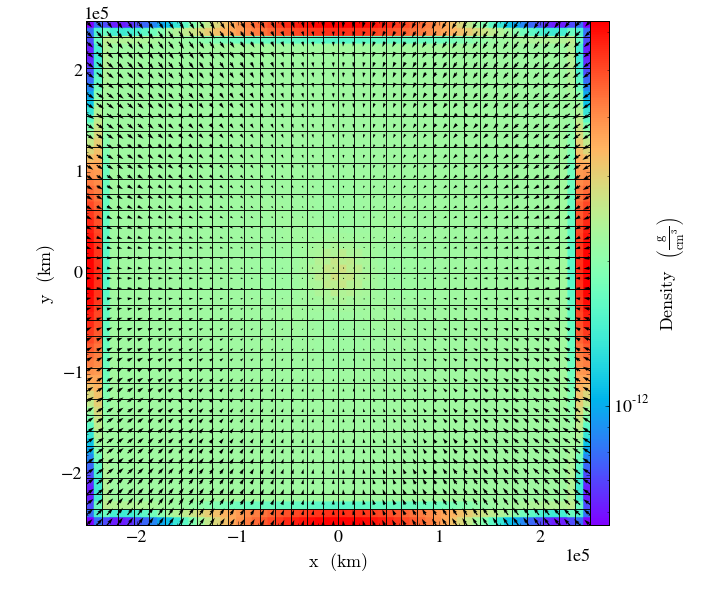

In [13]:
plot_time_slice("density",2)

### Without self gravity 


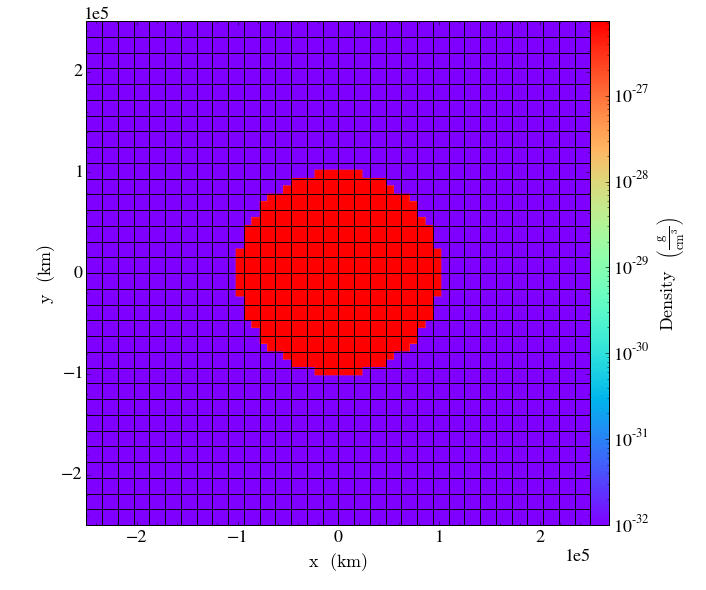

In [14]:
plot_time_slice("density",1)


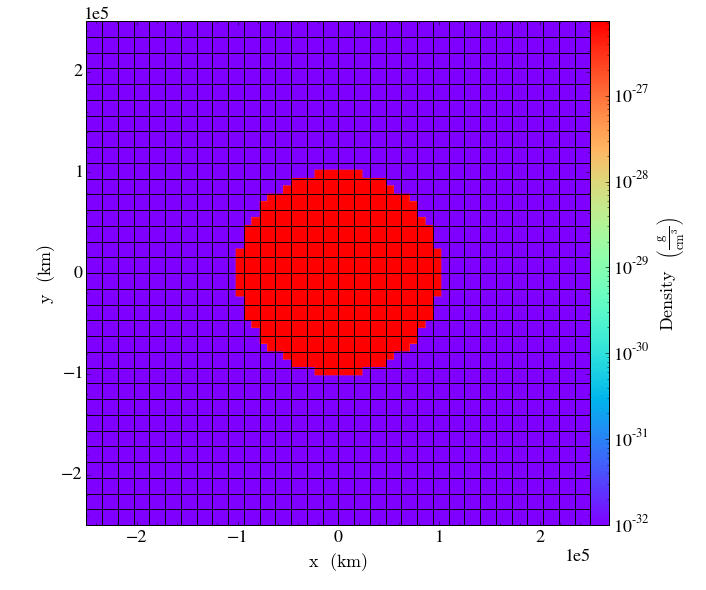

In [15]:
plot_time_slice("density",2)

Now changed to 


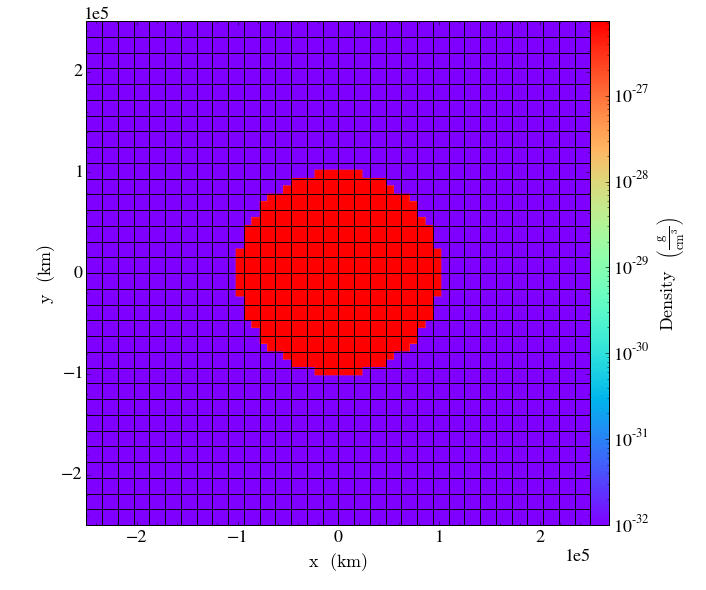

In [17]:
plot_time_slice("density",1)


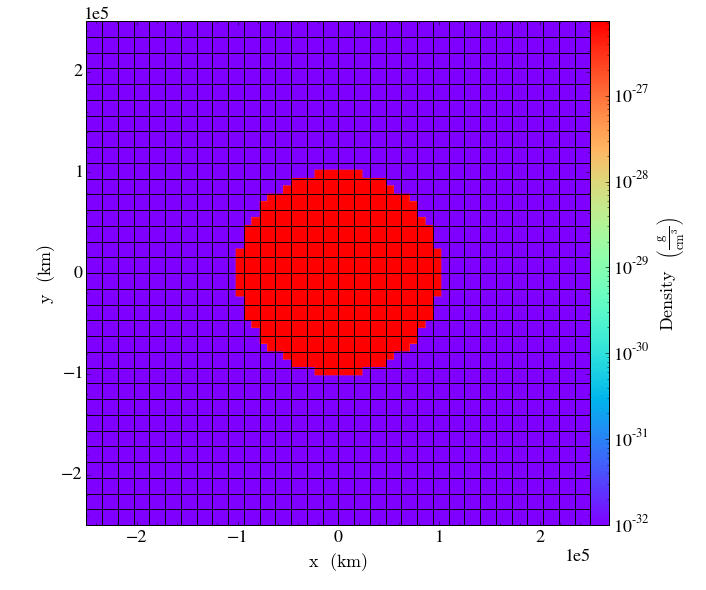

In [18]:
plot_time_slice("density",2)

Need to set timestep bigger than what the code is stepping through 


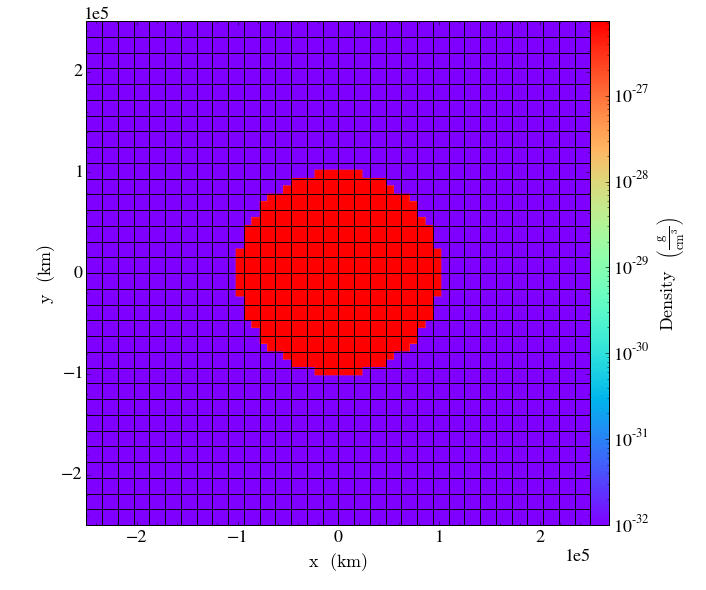


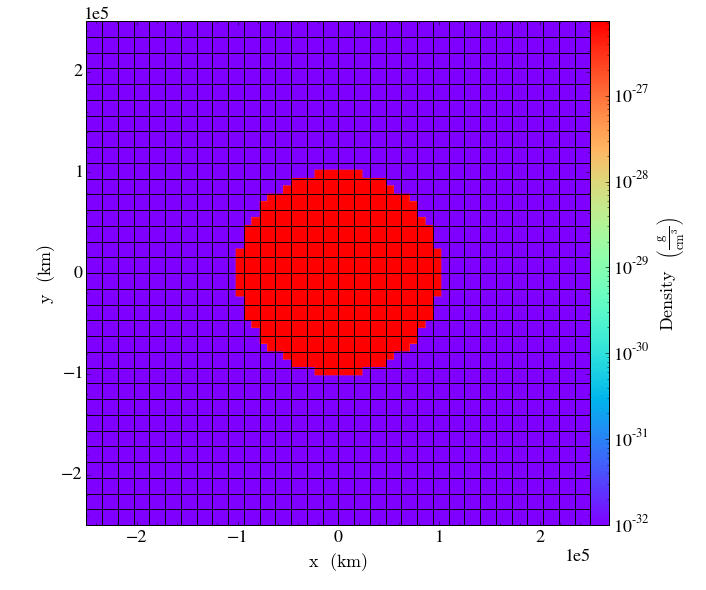


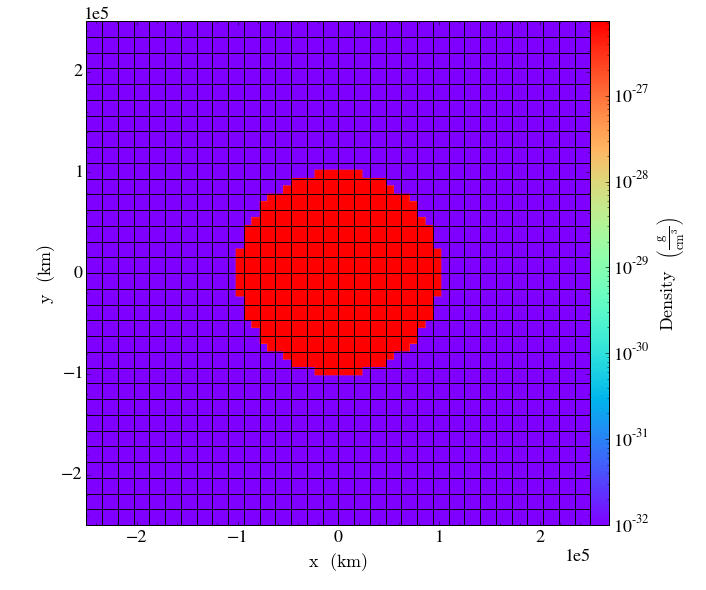


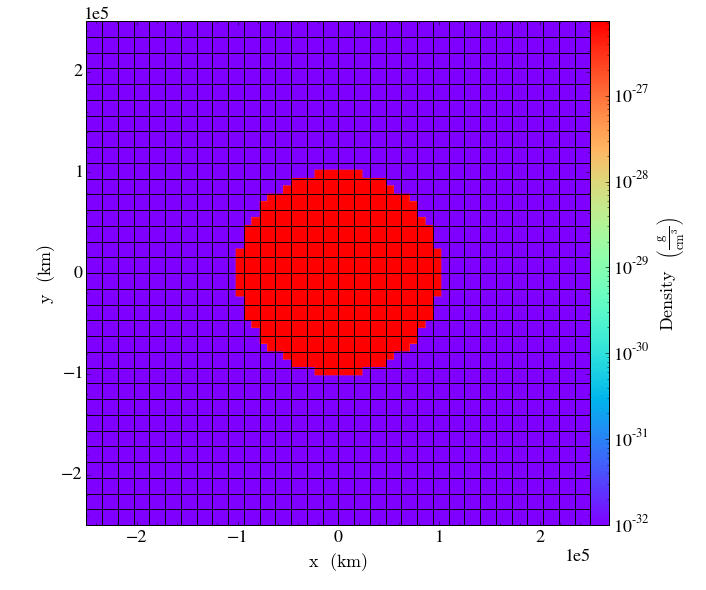


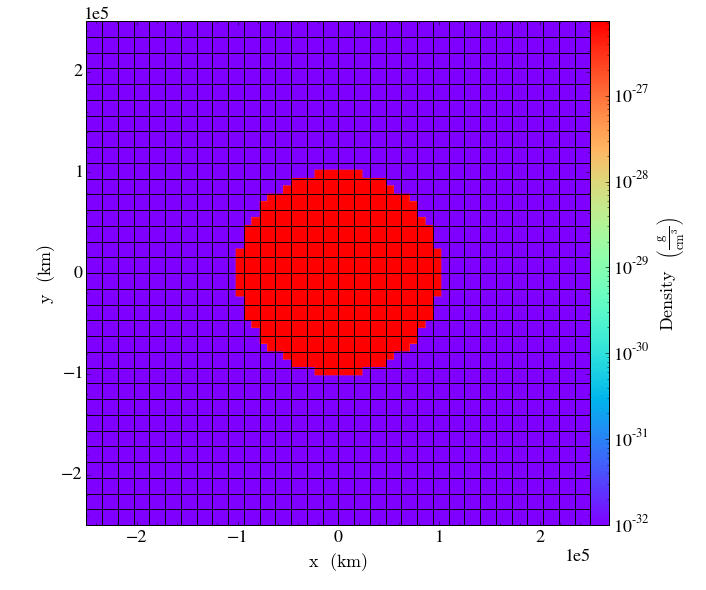


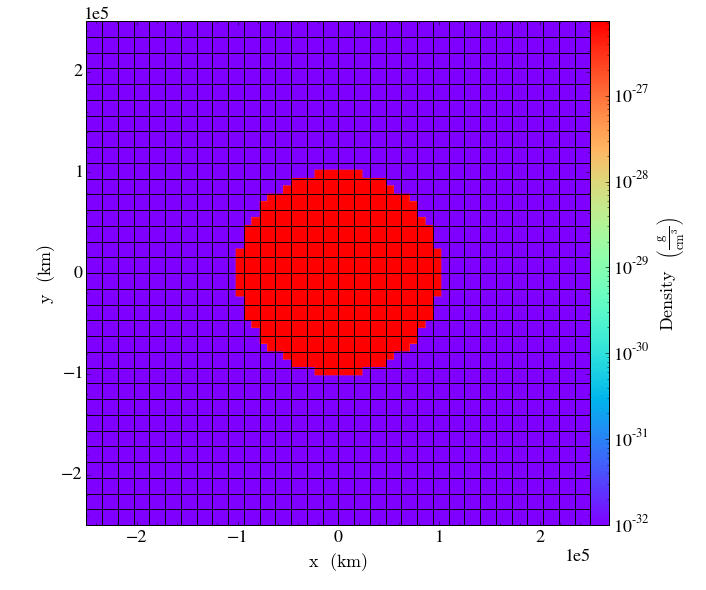


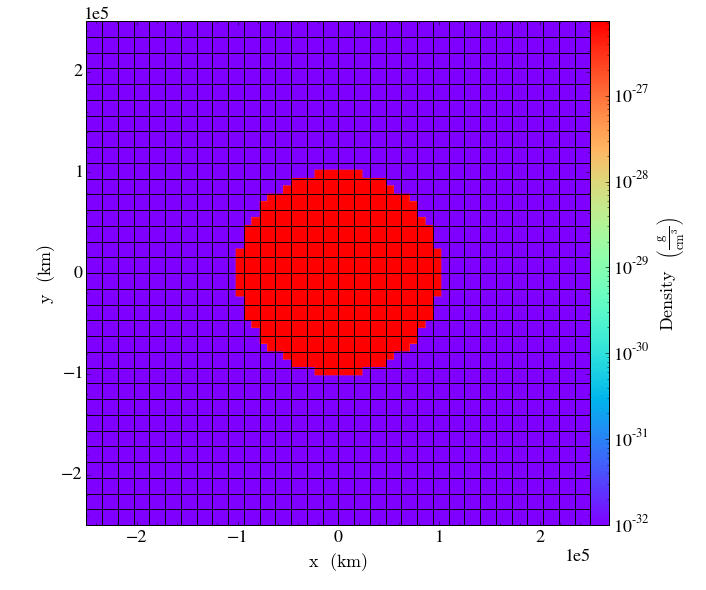


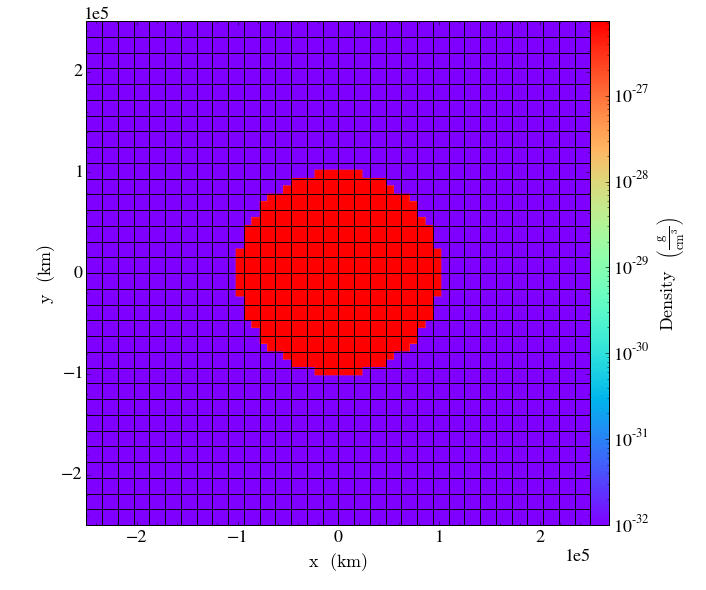


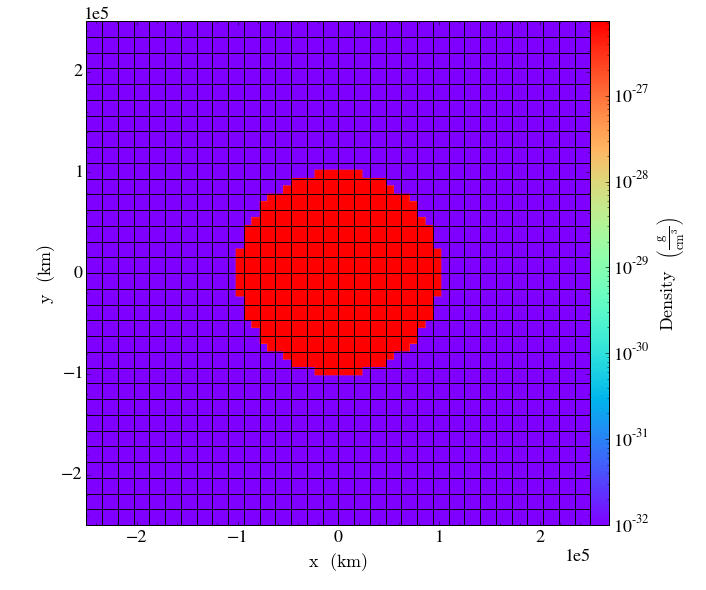

In [20]:
for i in np.arange(1,10):
    plot_time_slice("density",i)


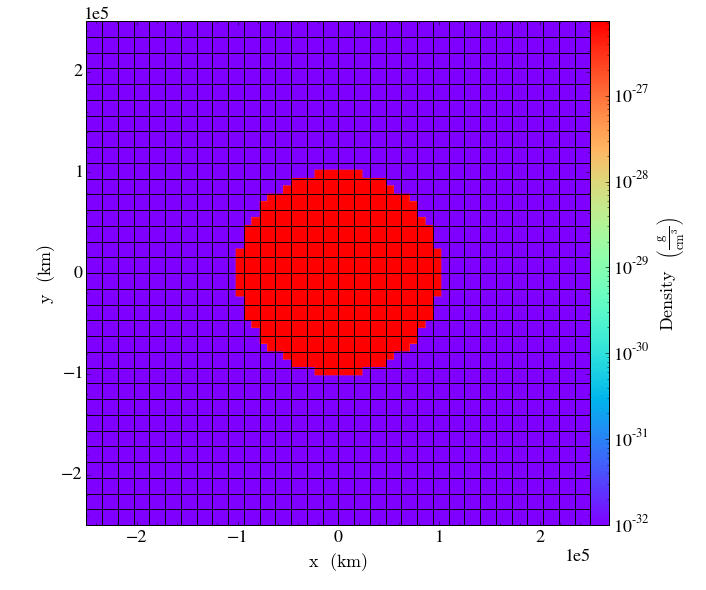


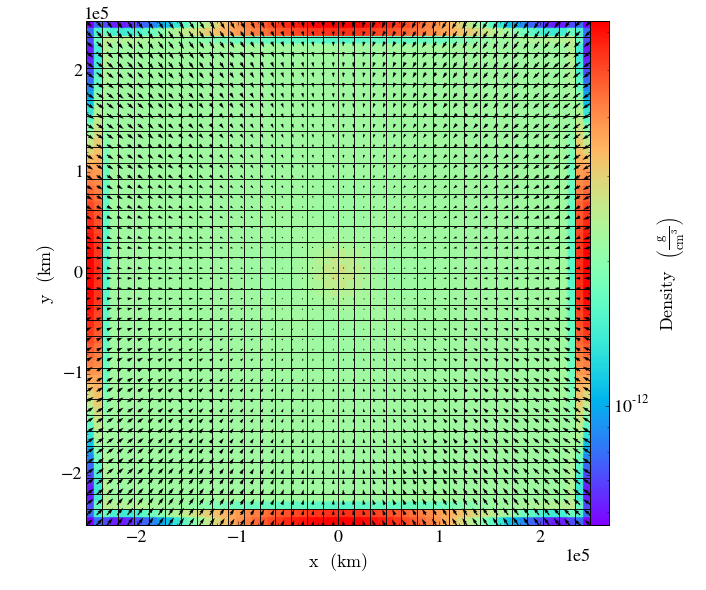


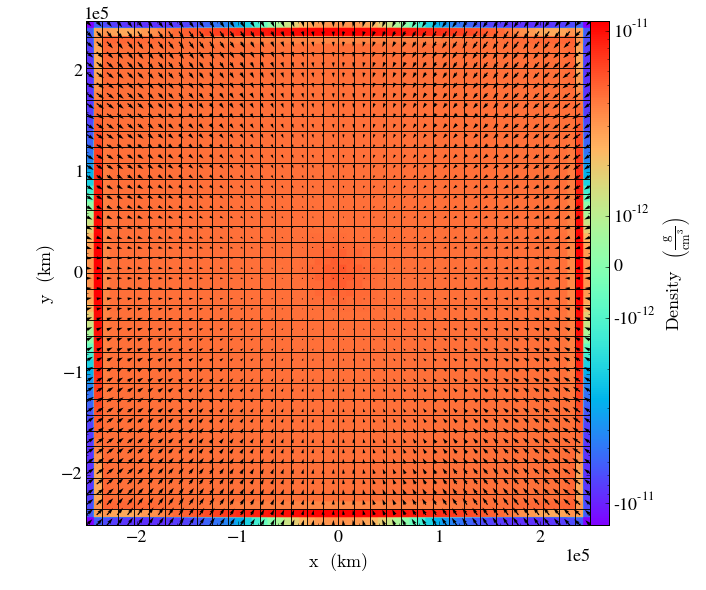


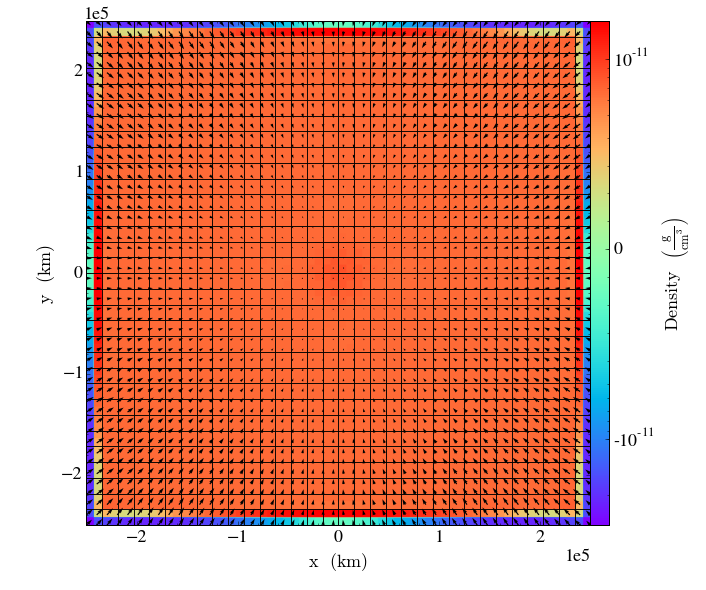


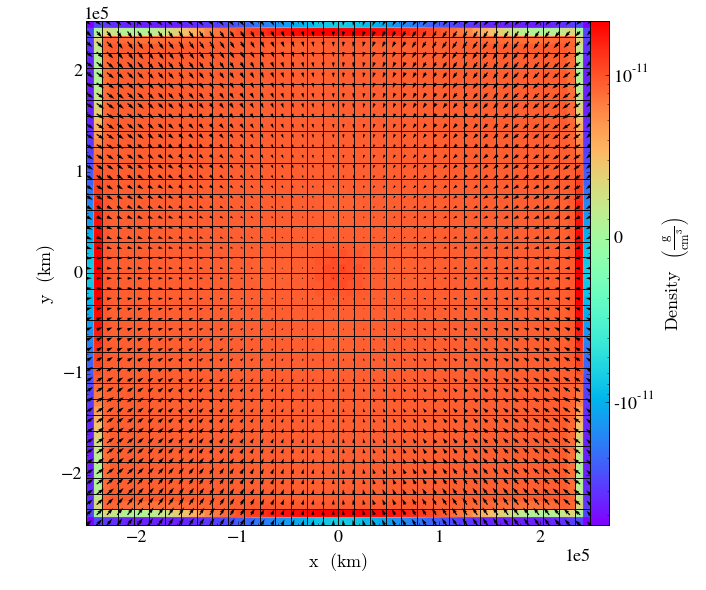


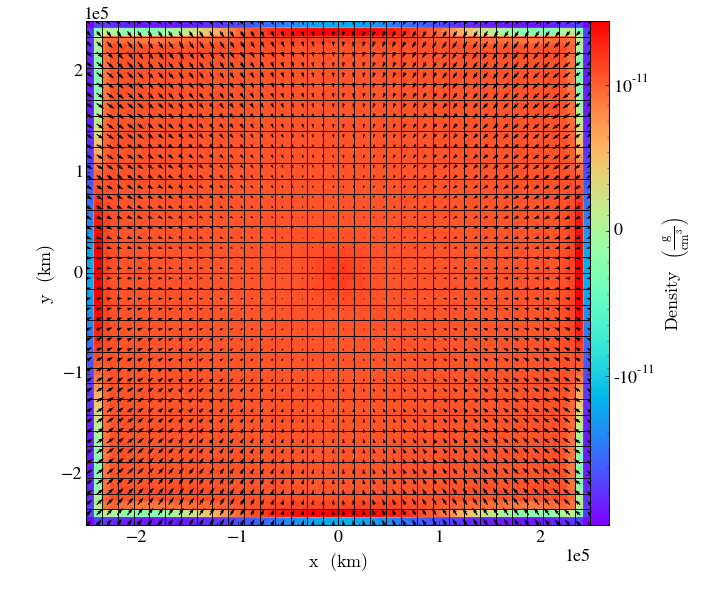


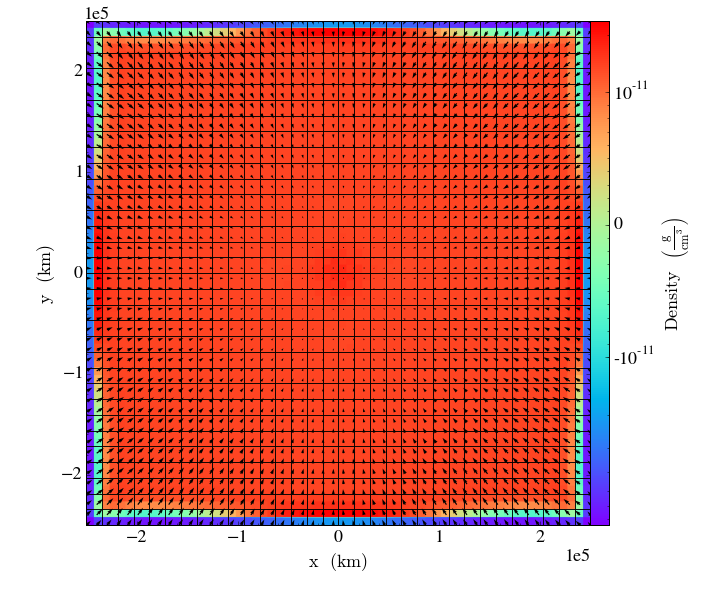


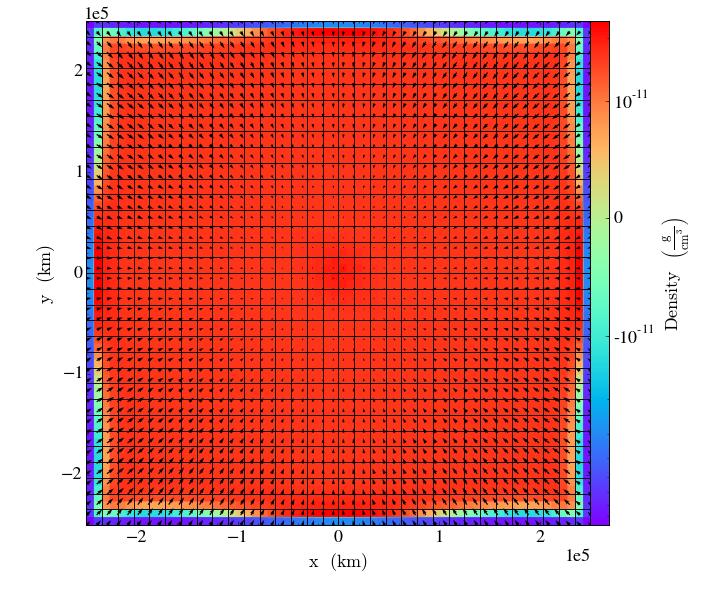


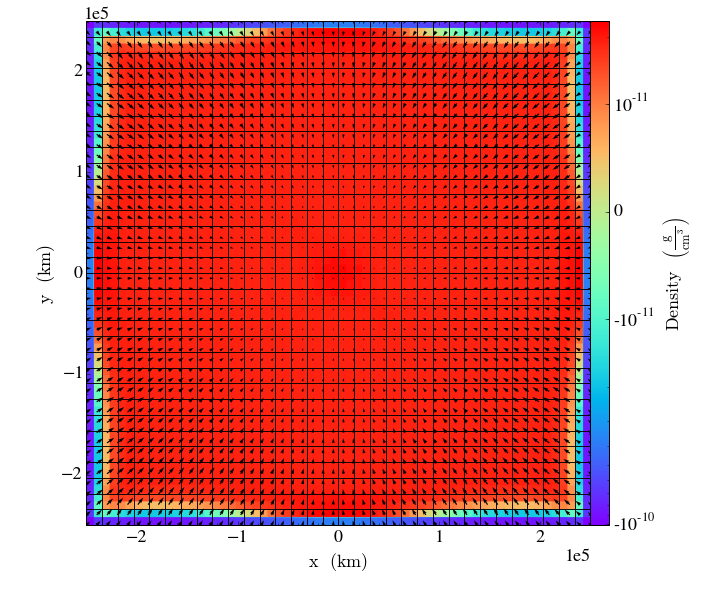

YTOutputNotIdentified: Supplied ('output_000010/info_000010.txt',) {}, but could not load!

In [25]:
for i in np.arange(1,40):
    plot_time_slice("density",i)

In [26]:
ls

adaptive_loop.o           newdt_fine.o   output_00058/
add_list.o                output_00001/  output_00059/
amr_commons.mod           output_00002/  output_00060/
amr_commons.o             output_00003/  output_00061/
amr_parameters.mod        output_00004/  output_00062/
amr_parameters.o          output_00005/  output_00063/
amr_step.o                output_00006/  output_00064/
bisection.mod             output_00007/  output_00065/
bisection.o               output_00008/  output_00066/
boundana.o                output_00009/  output_00067/
boundary_potential.o      output_00010/  output_00068/
clfind_commons.mod        output_00011/  output_00069/
clfind_commons.o          output_00012/  output_00070/
clump_finder.o            output_00013/  output_amr.o
clump_merger.o            output_00014/  output_hydro.o
condinit.o                output_00015/  output_part.o
const.mod                 output_00016/  output_poisson.o
cooling_fine.o            output_00017/  output_sink.o
cooling

# --------------------------------------------------------------------------------------------

In [13]:
def plot_time_proj(physical_quantity,timestep):
    ds= yt.load("output_0000{0}/info_0000{0}.txt".format(timestep))
    proj = yt.ProjectionPlot(ds, "z",physical_quantity ,window_size=7)
    proj.set_cmap("density","rainbow")
    proj.annotate_velocity()
    proj.annotate_grids()
    proj.show()

In [14]:
def plot_time_slice(physical_quantity,timestep):
    ds= yt.load("output_0000{0}/info_0000{0}.txt".format(timestep))
    proj = yt.SlicePlot(ds, "z",physical_quantity ,window_size=7)
    proj.set_cmap(physical_quantity,"rainbow")
    proj.annotate_velocity()
    proj.annotate_grids()
    proj.show()


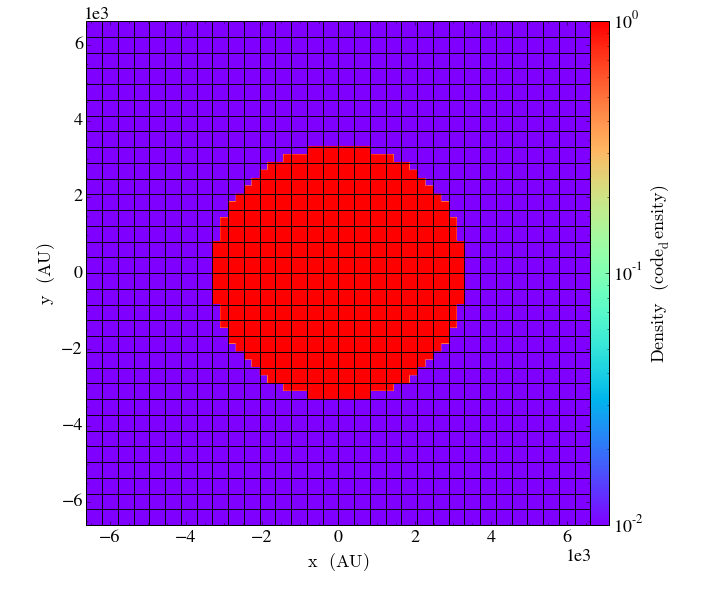


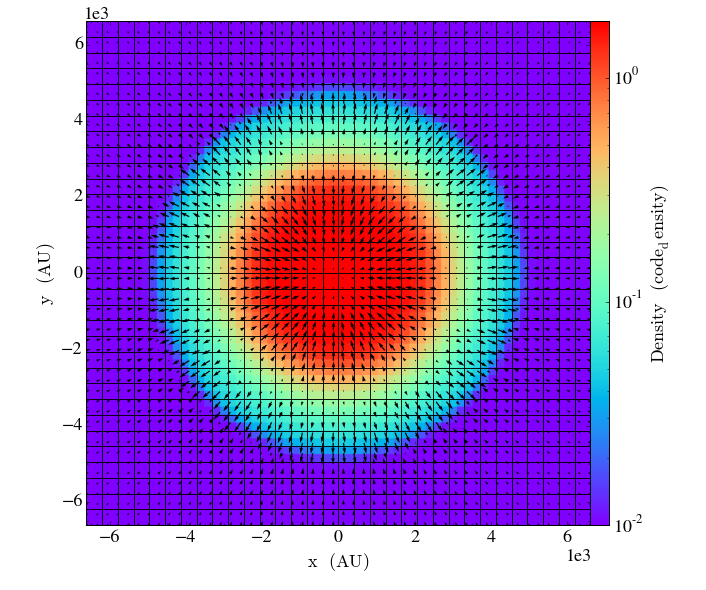


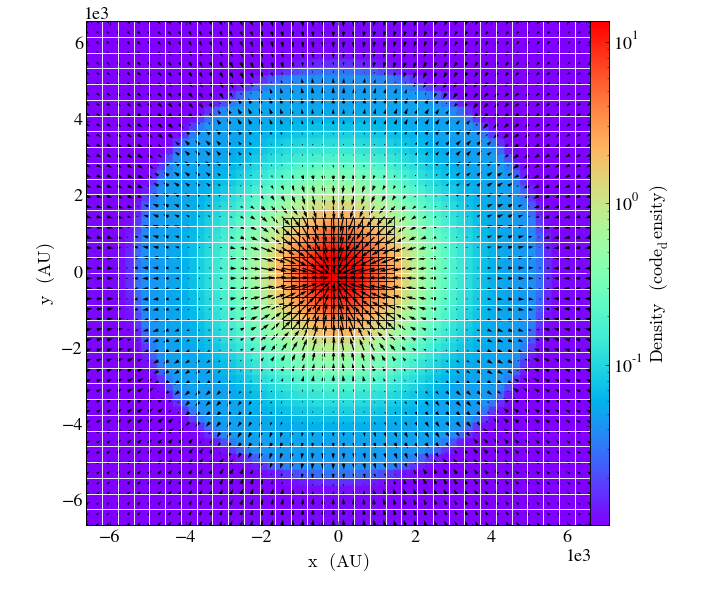


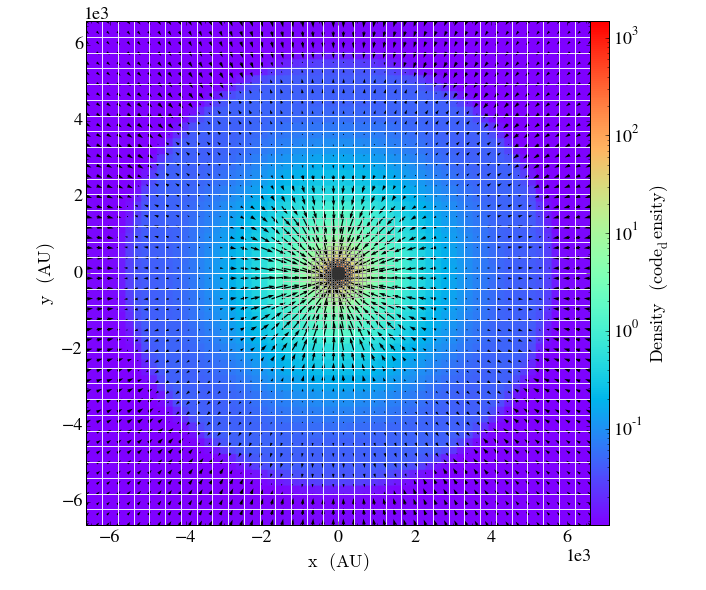


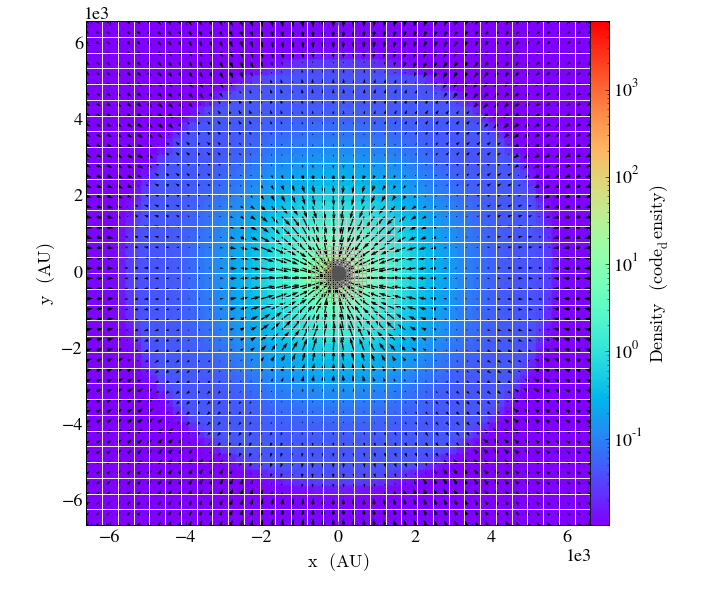


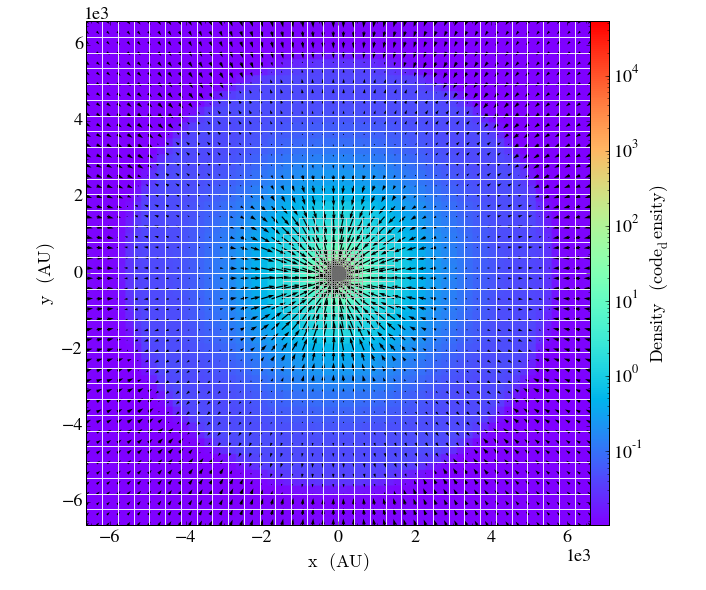


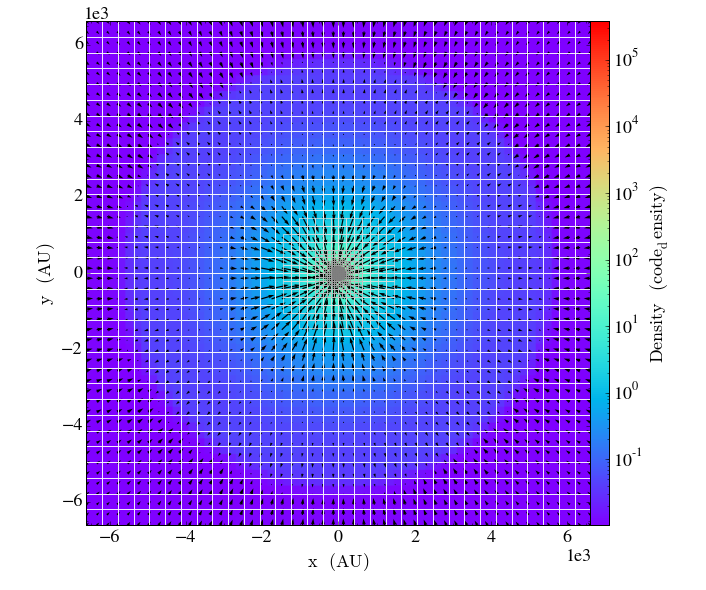


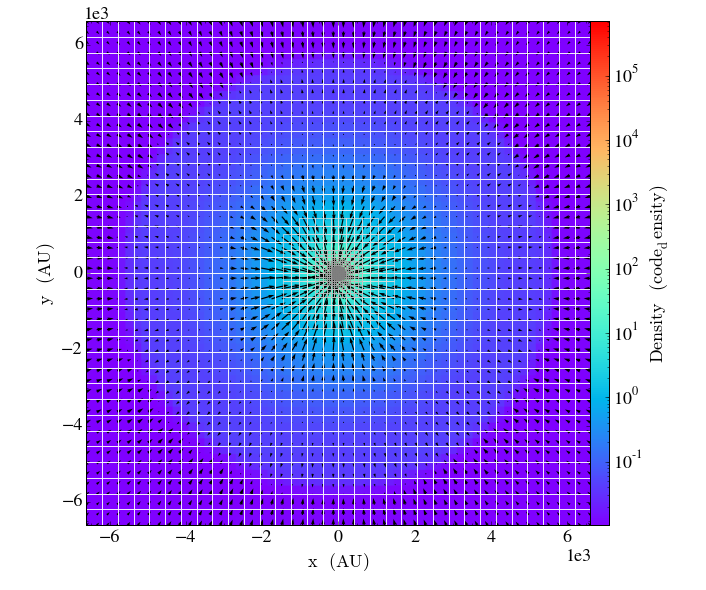


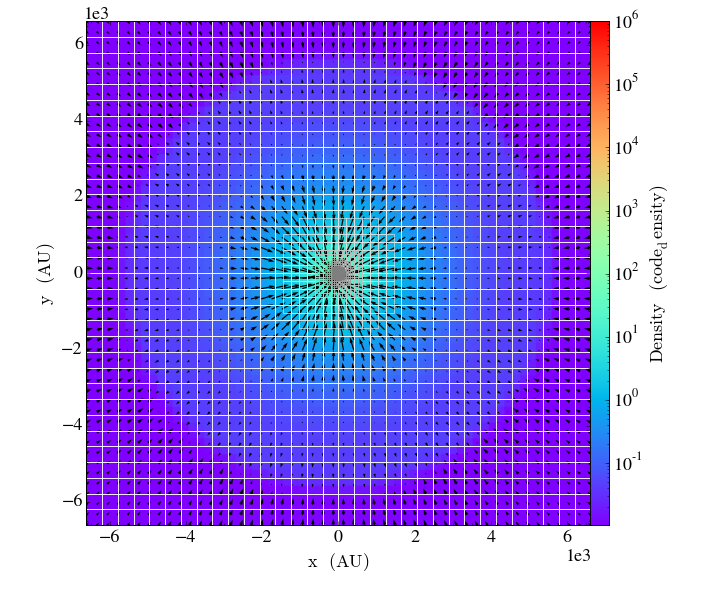

YTOutputNotIdentified: Supplied ('output_000010/info_000010.txt',) {}, but could not load!

In [16]:
max_timestep = 33
for i in np.arange(1,max_timestep):
    plot_time_slice("Density",i)

The time steps are limiting already after 3 hours to dt = 1e-6 


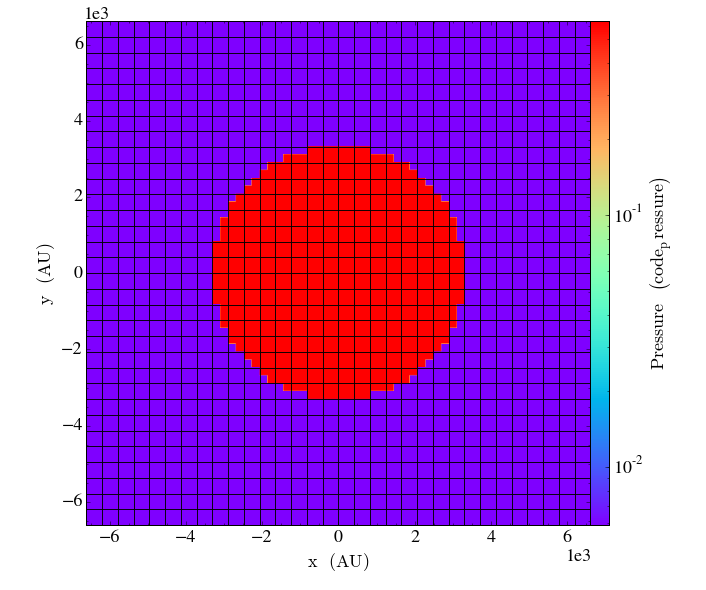


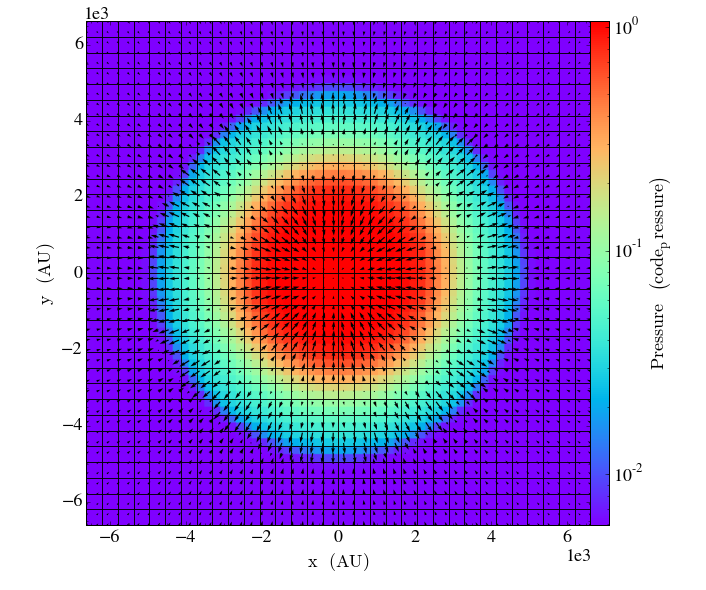


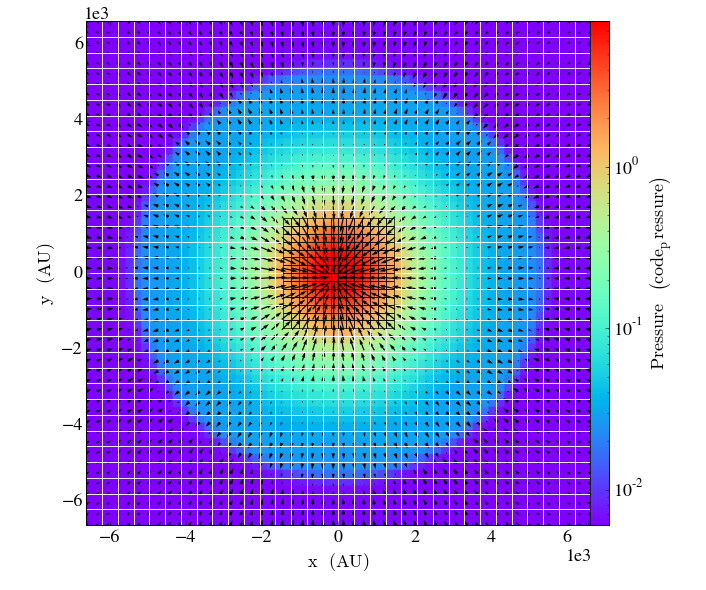


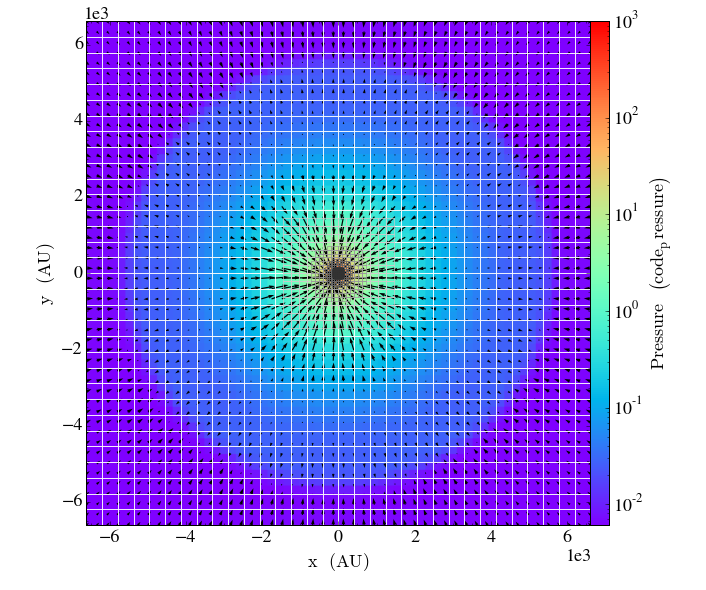


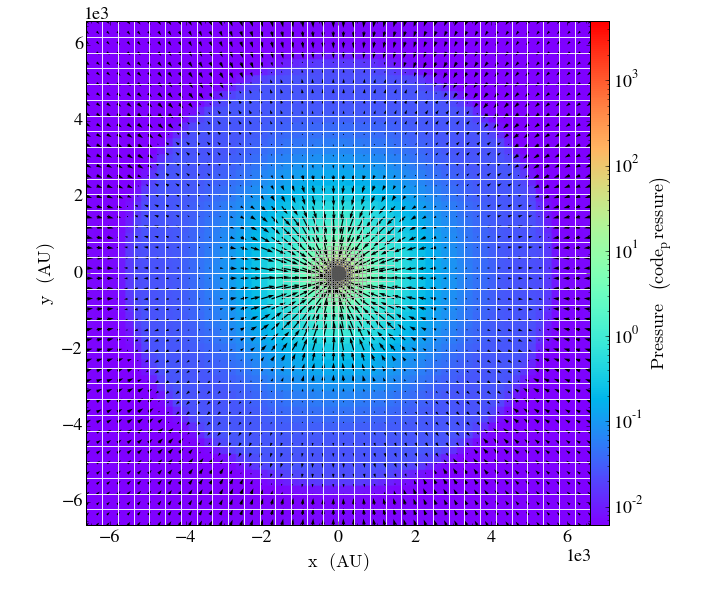


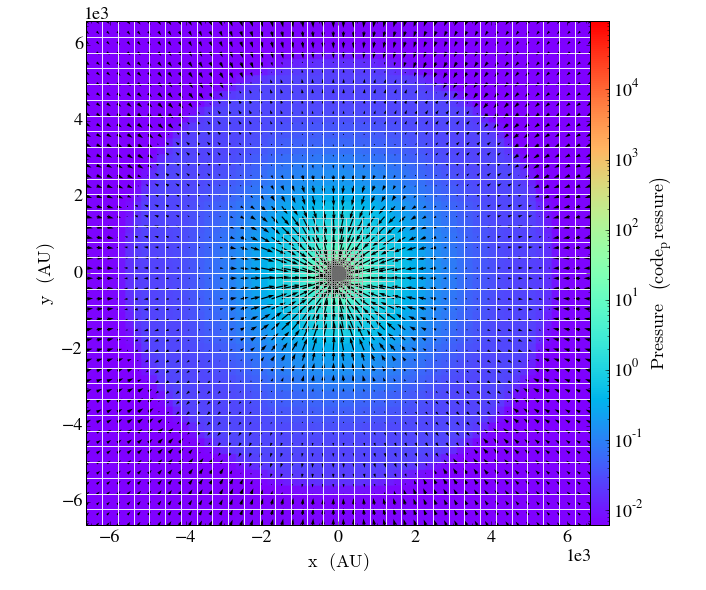


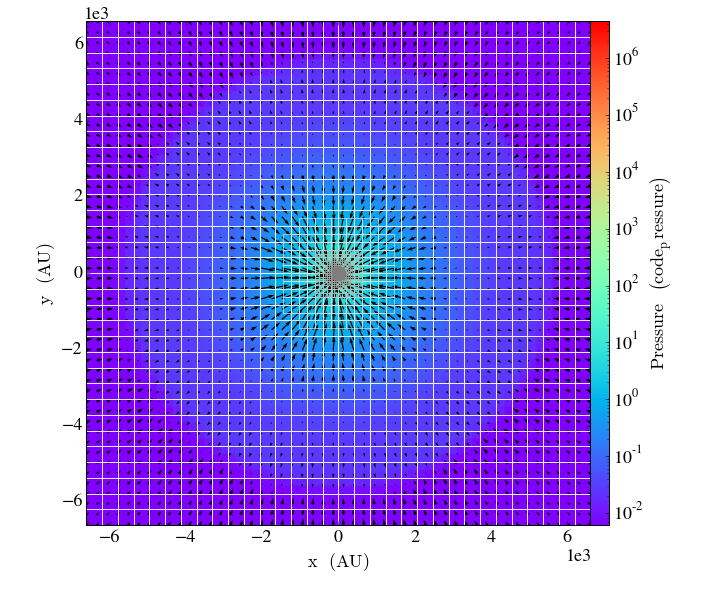


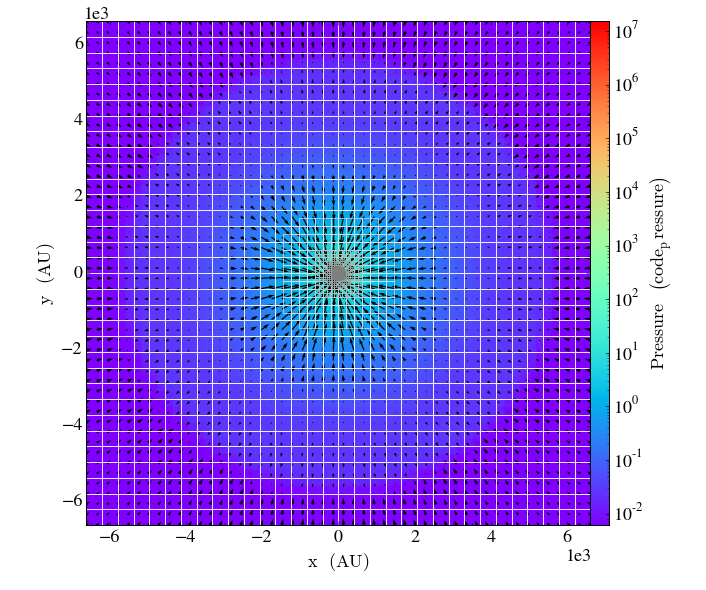


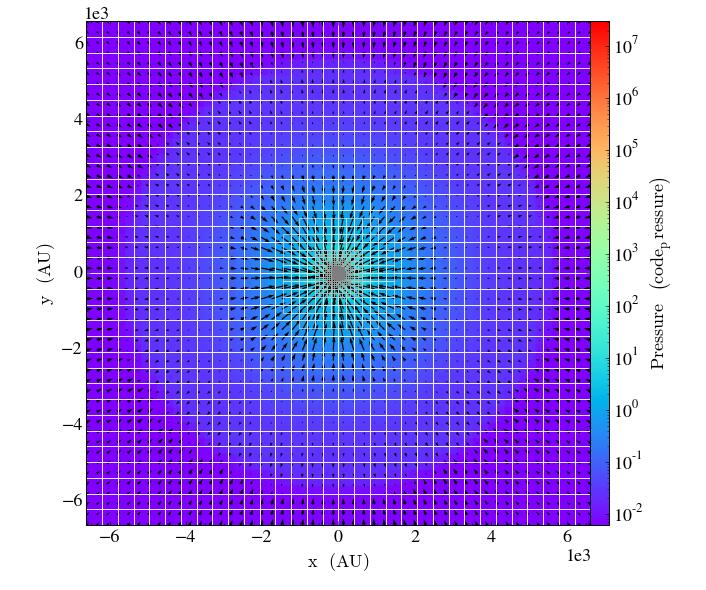

YTOutputNotIdentified: Supplied ('output_000010/info_000010.txt',) {}, but could not load!

In [15]:
max_timestep = 33
for i in np.arange(1,max_timestep):
    plot_time_slice("Pressure",i)

In [19]:
def density_radial_profile(timestep):
    ds= yt.load("output_0000{0}/info_0000{0}.txt".format(timestep))
    c = ds.find_max("density")[1]
    ax = 0 # Cut through x axis
    # cutting through the y0,z0 such that we hit the max density
    ray = ds.ortho_ray(ax, (c[1], c[2]))
    srt = np.argsort(ray['x'])
    plt.figure()
    plt.subplot(211)
    plt.loglog(np.array(ray['x'][srt]), np.array(ray['density'][srt]))
    plt.title("Timestep {}".format(timestep),fontsize=13)
    plt.xlabel("log Radius",fontsize=13)
    plt.ylabel('log Density',fontsize=13)
    # plt.subplot(212)

YTOutputNotIdentified: Supplied ('output_000010/info_000010.txt',) {}, but could not load!

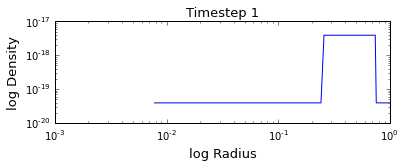

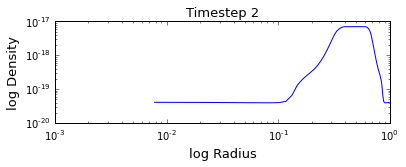

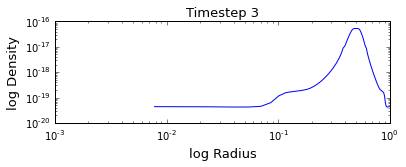

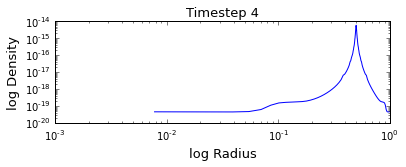

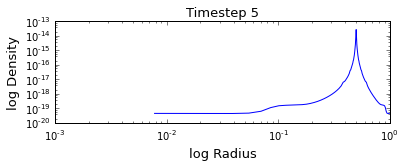

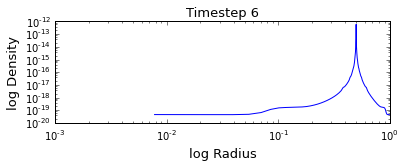

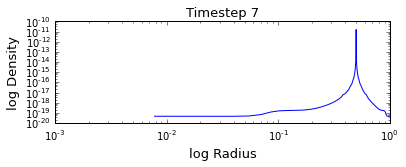

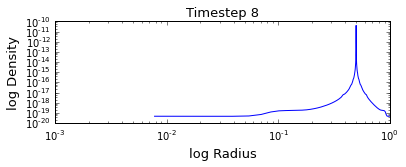

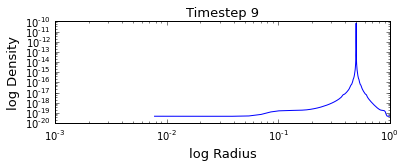

In [20]:
max_timestep = 33
for i in np.arange(1,max_timestep):
    density_radial_profile(i)

Doesn't really look like Fig 1 in Larson (1969)

- foutput: frequnecy of additional output for each coarse tim step 
- tout: value of specified output time (tout overrides foutput setting)
- fbackup function not specified in manual but I think it is how frequentyly you output a restart file for backup
- noutput =number of specified output time  
Here their noutput conflict with foutput?

### Trying this time setting on the isothermal sphere to see if it works (or stops because of some other reason)

So re-git cloned everything again and then created a separate branch called "is" for isothermal sphere, copied my isothermal sphere patch from the bad branch and then sucessfully compiled. 

I ran this and it still only took two timesteps and then stopped, so this tells me that its the code that's stopping not the time parameter governing it.'

Verified that everything in isothermalsphere/ is sensible, boundana.f90 is never used because I used a outflow boundary condition (bound_type =2) on all 6 sides so that there are zero gradient from the bounding box